# Assignment 4
# Group 8

Group Members: Ankit Mishra, Aniket Ghosh, Bikash Kumar Badatya, Bhushan Kape

Contributions:
Ankit Mishra :  33 % \
Bikash Kumar Badatya: 33 % \
Bhushan Kape: 33% 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# define circular geometry 
# this allows us to define exaclty one point circle
def bresenham_circle(x0, y0, radius):
  x = radius
  y = 0
  err = 0

  points = []

  while x >= y:
    points.append((x0 + x, y0 + y))
    points.append((x0 + y, y0 + x))
    points.append((x0 - y, y0 + x))
    points.append((x0 - x, y0 + y))
    points.append((x0 - x, y0 - y))
    points.append((x0 - y, y0 - x))
    points.append((x0 + y, y0 - x))
    points.append((x0 + x, y0 - y))

    y += 1
    err += 1 + 2*y
    if 2*(err-x) + 1 > 0:
      x -= 1
      err += 1 - 2*x

  return points

In [33]:
M, N = 201, 201
rad = 30
x0, y0 = 100,100

points = bresenham_circle(x0,y0,rad)


X, Y = np.meshgrid(range(M), range(N))

In [34]:
def set_boundary(V): 
    # set interior BC values 
    for i in range(len(points)):
        V[points[i][0],points[i][1]] = 10.
    return V

def relax(V, imax=30): 
    # find self−consistent soln 
    for i in range(imax):
        V[1:-1, 1:-1] = ( V[1:-1,:-2] + V[1:-1,2:] \
                         + V[:-2,1:-1] + V[2:,1:-1] )/4.
        # V = (np.roll(V,1,0) + np.roll(V,-1,0) + np.roll(V,1,1) +np.roll(V,-1,1))/4. 
        V = set_boundary(V)       
    return V



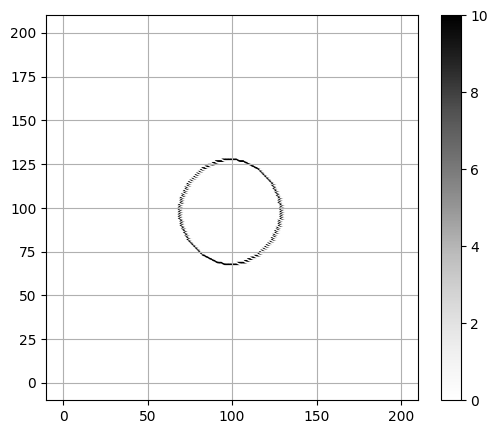

In [35]:
V = np.zeros((M,N))
V = set_boundary(V)
plt.figure(figsize=(6,5))
plt.scatter(X, Y, c=V.transpose(), cmap='Greys')
plt.colorbar()
plt.grid()
plt.show()


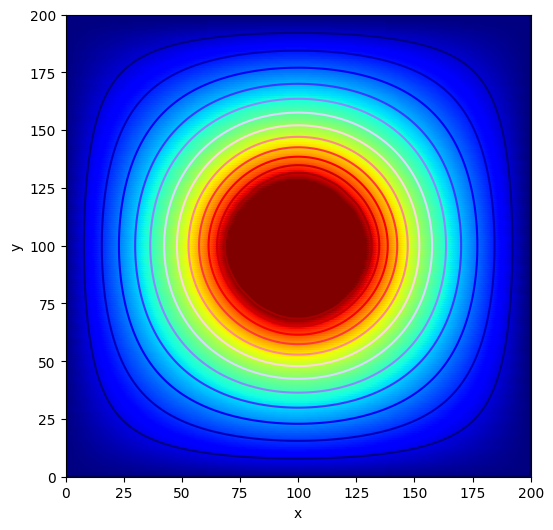

In [40]:
V = np.zeros((M,N))
V = set_boundary(V)
V = relax(V, 30000)

plt.figure(figsize=(6,6))


plt.scatter(X, Y, c=V.transpose(), cmap=plt.cm.jet)
plt.contour(X, Y, V.transpose(), 14, cmap=plt.cm.seismic)

# plt.colorbar()

plt.xlabel('x'), plt.ylabel ('y')
plt.show()

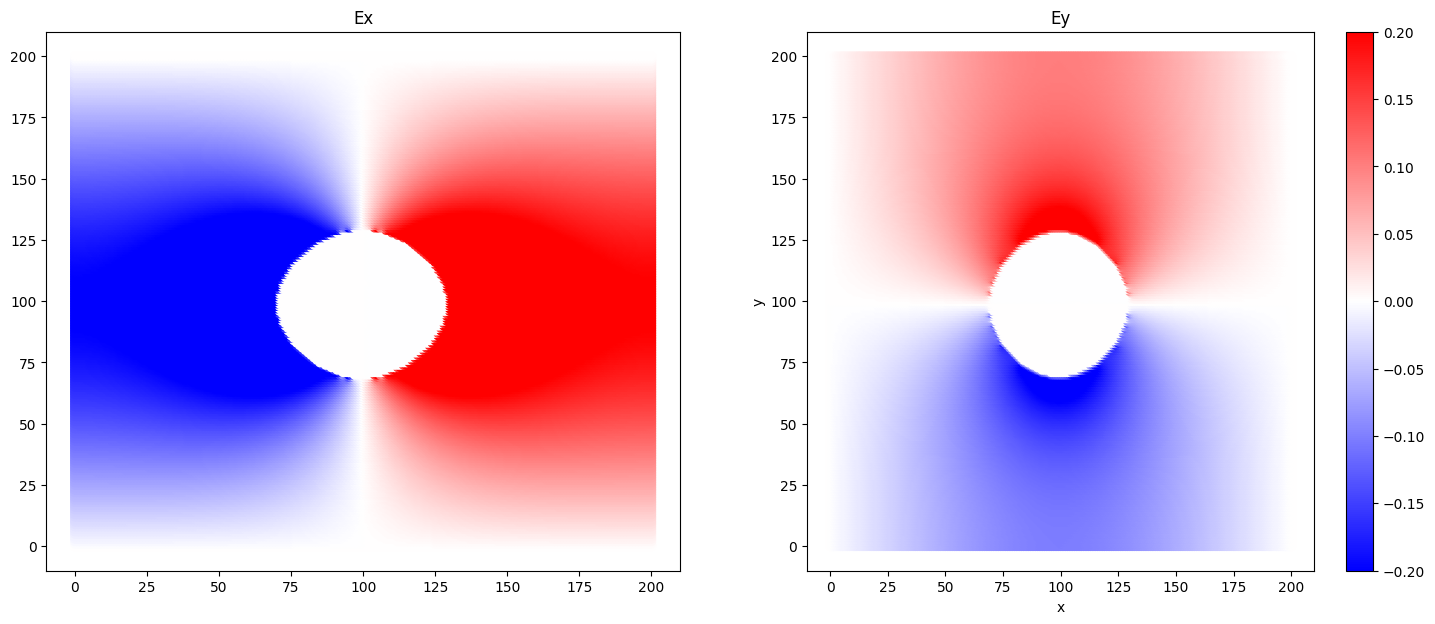

In [20]:
Ex, Ey = np.gradient(-V)
Emag = np.sqrt(Ex*Ex + Ey*Ey)


plt.figure(figsize=(18, 7))

#-- Ex field
ax = plt.subplot(121)
plt.title('Ex')
plt.scatter(X, Y, c=Ex.transpose(), vmin=-0.1, vmax=0.1, cmap=plt.cm.bwr)

#-- Ey field
ax = plt.subplot(122)
plt.title('Ey')
plt.scatter(X, Y, c=Ey.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

plt.colorbar()

ax.set_xlabel('x'), ax.set_ylabel ('y')
plt.show()

Text(0.5, 1.0, 'Electric Field Plot')

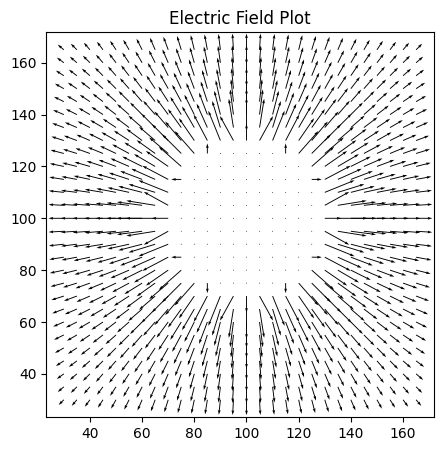

In [38]:
d= 30
a = 0 + d
b = 200-d
c =5
plt.figure(figsize=(5,5))
q = plt.quiver( X[a:b:c,a:b:c],Y[a:b:c,a:b:c], Ex.transpose()[a:b:c, a:b:c], Ey.transpose()[a:b:c,a:b:c],scale =3.0)
# plt.streamplot(X[a:b:c,a:b:c],Y[a:b:c,a:b:c], Ex.transpose()[a:b:c, a:b:c], Ey.transpose()[a:b:c,a:b:c])
# plt.quiverkey(q, X=0*0.3, Y=0*1.1, U=1,
#              label='Quiver key, length = 10', labelpos='E')
plt.title('Electric Field Plot')
